# Persiapan Library dan Dataset
Mengimport semua library yang dibutuhkan

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print(tf.__version__) # melihat versi tensorflow yang digunakan

2.2.0


Using TensorFlow backend.


Mempersiapkan dataset yang akan digunakan

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-12 09:59:37--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.46MB/s    in 48s     

2020-06-12 10:00:26 (6.39 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Megekstrak data yang telah diunduh sebelumnya

In [0]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Mendefinisikan nama direktori untuk data training dan validation

In [0]:
dasar_dir = '/tmp/rockpaperscissors/rps-cv-images'
training_dir = os.path.join(dasar_dir)
validation_dir = os.path.join(dasar_dir)

# Data Preprocessing
Membuat objek ImageDataGenerator pada data  training dan validation untuk melakukan proses augmentasi gambar

In [0]:
datagen = ImageDataGenerator(validation_split=0.2, 
                             rescale=1./255, 
                             shear_range=0.2, 
                             rotation_range=20, 
                             horizontal_flip=True, 
                             fill_mode='nearest')

Menggunakan ImageDataGenerator sebelumnya untuk mempersiapkan data latih yang akan dipelajari modelnya

In [6]:
training_generator = datagen.flow_from_directory(training_dir,
                                              subset='training',
                                              target_size=(200,300),
                                              batch_size=20,
                                              class_mode='categorical')
validation_generator = datagen.flow_from_directory(validation_dir,
                                                   subset='validation',
                                                   target_size=(200,300),
                                                   batch_size=20,
                                                   class_mode='categorical')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


# Model Selection
Membangun arsitektur sebuah Convolutional Neural Network (CNN) dan menentukan parameter-parameter yang sesuai

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5), # mencegah terjadinya overfitting
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.8), # mencegah terjadinya overfitting
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 149, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 147, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 73, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 35, 128)       0

Memanggil objek compile pada objek model serta menentukan loss function dan optimizer yang sesuai dengan kelas data

In [0]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Membentuk objek fungsi callback untuk memonitoring tingkat akurasi dan akan menghentikannya jika data telah mencapai akurasi maksimal saat propagasi

In [0]:
 callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=20, mode='max')

Melatih model dengan metode fit

In [11]:
jejak = model.fit(
      training_generator,
      callbacks=[callback] ,
      steps_per_epoch=25,
      epochs=60,
      validation_data=validation_generator, 
      validation_steps=5, 
      verbose=2)

Epoch 1/60
25/25 - 10s - loss: 2.0220 - accuracy: 0.3483 - val_loss: 1.0987 - val_accuracy: 0.3900
Epoch 2/60
25/25 - 10s - loss: 1.0970 - accuracy: 0.3707 - val_loss: 1.0974 - val_accuracy: 0.3100
Epoch 3/60
25/25 - 10s - loss: 1.0962 - accuracy: 0.3480 - val_loss: 1.0864 - val_accuracy: 0.4100
Epoch 4/60
25/25 - 10s - loss: 1.0591 - accuracy: 0.4073 - val_loss: 1.0128 - val_accuracy: 0.5500
Epoch 5/60
25/25 - 10s - loss: 1.0288 - accuracy: 0.4786 - val_loss: 0.9606 - val_accuracy: 0.7200
Epoch 6/60
25/25 - 10s - loss: 0.9089 - accuracy: 0.5440 - val_loss: 0.7183 - val_accuracy: 0.8000
Epoch 7/60
25/25 - 10s - loss: 0.6960 - accuracy: 0.7120 - val_loss: 0.6809 - val_accuracy: 0.8300
Epoch 8/60
25/25 - 10s - loss: 0.6092 - accuracy: 0.7500 - val_loss: 0.4195 - val_accuracy: 0.8900
Epoch 9/60
25/25 - 10s - loss: 0.4623 - accuracy: 0.8240 - val_loss: 0.3665 - val_accuracy: 0.9000
Epoch 10/60
25/25 - 10s - loss: 0.4514 - accuracy: 0.8160 - val_loss: 0.3329 - val_accuracy: 0.9000
Epoch 11/

# Model Evaluation
Membuat model accuracy dan loss dari data training dan validation untuk melihat bias dan variance-nya

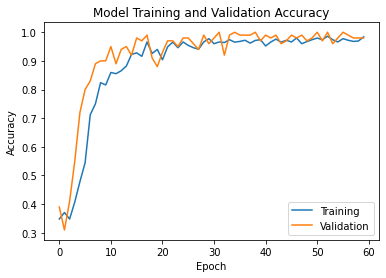

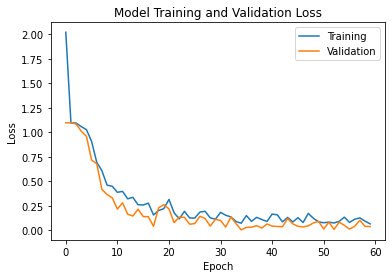

In [13]:
plt.plot(jejak.history['accuracy'])
plt.plot(jejak.history['val_accuracy'])
plt.title('Model Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()
print()
plt.plot(jejak.history['loss'])
plt.plot(jejak.history['val_loss'])
plt.title('Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Melihat hasil dari model yang telah dibuat dengan cara mengupload foto dan akan diprediksi jenis kelasnya 

Saving 0t08v9bAaA0mXGCQ.png to 0t08v9bAaA0mXGCQ.png
0t08v9bAaA0mXGCQ.png
----------PAPER---------


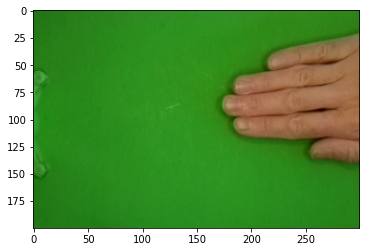

In [14]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # memprediksi gambar
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('----------PAPER---------')
  elif classes[0][1]==1:
    print('----------ROCK----------')
  elif classes[0][2]==1:
    print('--------SCISSORS--------')